# ПРОГНОЗИРОВАНИЕ  ОТТОКА  КЛИЕНТОВ  ФИТНЕС-ЦЕНТРА.

# Цель проекта

Провести анализ оттока клиентов фитнес клуба и подготовить план действий по удержанию клиентов, а именно: разработать рекомендации по повышению качества работы с клиентами.

# Описание данных

Данные клиента за предыдущий до проверки факта оттока месяц:

- 'gender' — пол;

- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;

- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);

- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);

- 'Phone' — наличие контактного телефона;

- 'Age' — возраст;

- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).



Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);

- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);

- 'Group_visits' — факт посещения групповых занятий;

- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;

- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;

- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.


- 'Churn' — факт оттока в текущем месяце.

# План работы:

[1. Изученние датасета, предобработка](#share)

[2. Исследовательский анализ данных (EDA)](#two)

[3. Построение модели прогнозирования оттока клиентов](#three)

[4. Кластеризация клиентов фитнес-центра](#four)

[5. Выводы и базовые рекомендации по работе с клиентами](#five)

 <a id="share"></a> 
 ## Изучение данных, предобработка

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import math as mth

from plotly import graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from termcolor import colored

# импортируем разметку markdown
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.options.mode.chained_assignment = None

In [2]:
# прочитаем датасет, посмотрим общую информацию, проверим пропуски, дубликаты, уникальные названия событий
df_gym = pd.read_csv('/datasets/.........csv')

display(df_gym.sample(n=10, random_state=123))
print('*'*50)                   
df_gym.info()
print('*'*50)                   
print('Дубликатов:', df_gym.duplicated().sum())


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1203,0,1,1,0,1,12,0,37,157.501037,12.0,3,3.682757,3.618407,0
2827,1,1,1,0,1,12,1,35,315.317398,12.0,16,2.598011,2.584082,0
2325,1,1,1,1,0,6,1,28,93.195415,6.0,1,1.367693,0.110712,1
3916,1,1,0,1,1,1,1,28,65.552783,1.0,0,2.080547,2.224451,0
3821,0,1,0,0,1,1,1,27,89.730730,1.0,1,1.672176,1.777785,1
2093,0,1,0,0,1,1,0,22,64.136944,1.0,0,1.339513,1.116673,1
861,0,0,0,0,0,1,0,26,6.333391,1.0,0,0.931418,0.379235,1
3339,0,1,0,0,1,1,1,29,141.867035,1.0,3,1.075681,1.978230,1
736,1,1,1,1,1,1,0,28,158.872713,1.0,2,0.825241,0.749740,0
3848,1,1,1,1,1,12,0,28,5.219341,10.0,12,3.075086,3.129828,0


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_c

In [3]:
#переведем названия колонок в нижний регистр
df_gym.columns = df_gym.columns.str.lower()

In [4]:
#переведем тип данных в целочисленный
df_gym.month_to_end_contract = df_gym.month_to_end_contract.astype(np.int64)

In [5]:
#посмотрим на таблицу после обработки
display(df_gym.sample(n=10, random_state=123))

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
1203,0,1,1,0,1,12,0,37,157.501037,12,3,3.682757,3.618407,0
2827,1,1,1,0,1,12,1,35,315.317398,12,16,2.598011,2.584082,0
2325,1,1,1,1,0,6,1,28,93.195415,6,1,1.367693,0.110712,1
3916,1,1,0,1,1,1,1,28,65.552783,1,0,2.080547,2.224451,0
3821,0,1,0,0,1,1,1,27,89.730730,1,1,1.672176,1.777785,1
2093,0,1,0,0,1,1,0,22,64.136944,1,0,1.339513,1.116673,1
861,0,0,0,0,0,1,0,26,6.333391,1,0,0.931418,0.379235,1
3339,0,1,0,0,1,1,1,29,141.867035,1,3,1.075681,1.978230,1
736,1,1,1,1,1,1,0,28,158.872713,1,2,0.825241,0.749740,0
3848,1,1,1,1,1,12,0,28,5.219341,10,12,3.075086,3.129828,0


### Вывод

В данных 4000 строк и 14 столбцов, дубликатов и пропусков нет. 

Привели к нижнему регистру названия столбцов. Тип данных столбца 'month_to_end_contract' (месяц), перевели в целочислительный для дальнейшего удобства работы с данными. Изучим далее датасет в разрезе средних значений и стандартных отклонений.

<a id="two"></a>
##  Исследовательский анализ данных (EDA)

### Изучение средних значений и стандартных отклонений 

In [6]:
df_gym.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


### Вывод

При изучении датасета методом describe можем сделать следующие предварительные выводы по средним значениям:

- среди клиентов  количество  женщин и мужчин примерно равное;
- клиентов, которые проживают в районе, где находится фитнес-центр - 84,5 %;
- по партнерской программе клиентами центра являются около 48,7 %;
- по акции "приведи друга" не так много клиентов, всего около 31 %;
- номер телефона указан в данных пости всех клиентов - 90 %;
- исходя из стандартного отклонения, средего значения и медианы, более половины клиентов имеют абонемент длительностью в один месяц.(Длительность текущего действующего абонемента в фитнес-центре (месяц, 6 месяцев, год);
- групповые занятия посещают около 41 % клиентов;
- средний возраст клиентов - 29 лет;
- средняя суммарная выручка от других услуг фитнес-центра составляет около 147 у.е.;
- средний срок до окончания текущего действующего абонемента - 4,3 месяца. Здесь наблюдается высокое стандартное отклонение в 4 месяца, и при этом исходя из медианы, больше чем у половины клиентов абонемент прекращается уже в течение месяца;
- средняя продолжительность времени с момента первого обращения в фитнес-центр - 3,7 месяца. Здесь также видим высокое стандартное отклонение, и у половины клиентов с момента первого обращения прошло 3 месяца. Учитывая, что более половины клиентов имеют абонемент длительностью в один месяц, это признак не является позитивным;
- средняя частота посещений в неделю за все время с начала действия абонемента около 1,9 раз;
- средняя частота посещений в неделю за предыдущий месяц около 1,8 раз;
- средний пказатель оттока клиентов в текущем месяце - 30 %. Не мало. Будем исследовать далее.




### Изучение средних значений признаков в двух группах (ушел в отток /остался).

In [7]:
df_gym.groupby('churn').agg('mean').T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


### Вывод.

По группам "ушел в отток/остался" клиенты распределились следующим образом ("0" - те кто остался; "1" - те, кто ушел):
- мужчины и женщины в равной степени
- проживание в районе фитнес-центра также не сильно отличается по группам оттока: 87% остались и 76% ушли
- клиенты по партнерским программам чаще остаются (53%), чем те, кто не является таковым клиентом (35%)
- те, кто приходит заниматься в фитнес-центр по акции "приведи друга" в 2 раза чаще остаются (35%), уходят - 18 %
- наличие номера телефона в данных клиента не влияет на отток - равные показатели
- те, у кого абонемент около 6 месяцев не попадают в отток
- занимаясь в группах, клиенты чаще остаются продолжать заниматься спортом в центре, таких 46 % против 27 %
- по возрастной категории остаются клиенты в возрасте 29-30 лет, в отток попадают 26-27 летние
- средняя сумма дополнительных затрат  оставшихся клиентов - 158 у.е., тех кто попал в отток - 115 у.е.
- в отток попадают клиенты, у которых срок до окончания текущего действующего абонемента в среднем около 1,7  месяца. Клиенты, с абонементами , до окончания срока которых в среднем 5,3 месяца - остаются.
- клиенты, у которых время с момента первого обращения в фитнес-центр в среднем около 4,7 месяца - остаются. Отток клиентов наблюдается со сроком с первого обращения меньше месяца.
- клиенты со средней частотой посещений около 2 (двух) раз в неделю за все время с начала действия абонемента - остаются, уходят те, кто посещает финтес центр в среднем 1 раз в неделю
- по средней частоте посещений в неделю за предыдущий месяц картина аналогичная: те кто посещает финтес-центр 2 раза в неделю - остаются, в отток подадают клиенты с посещением - один раз в неделю.

### Построение столбчатых гистограмм и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

In [8]:
def hist_gym(i):
    df_gym_lost = df_gym[df_gym['churn'] == 1]
    df_gym_good = df_gym[df_gym['churn'] == 0]
    plt.figure(figsize = (12, 5))
    sns.distplot(df_gym_lost[i], color = 'orange')
    sns.distplot(df_gym_good[i], color = 'blue' )
    plt.xlabel('распределение')
    plt.ylabel('плотность')
    plt.legend(labels=['Отток', 'Оставшиеся клиенты'], fontsize = 12)
    plt.title(i, fontsize=12);
    plt.show()

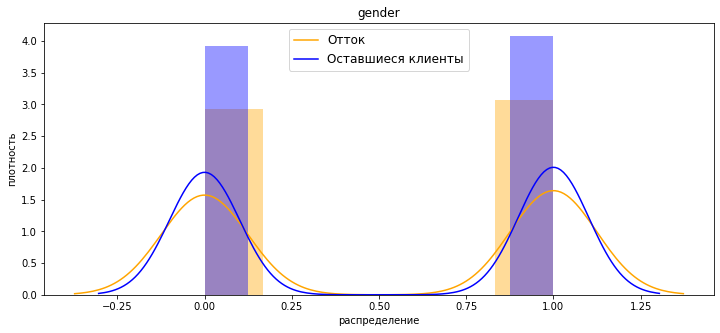

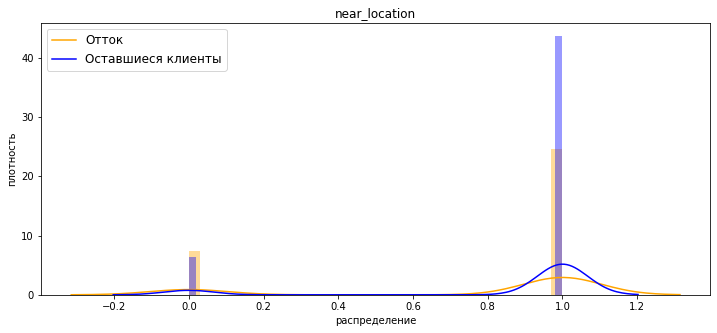

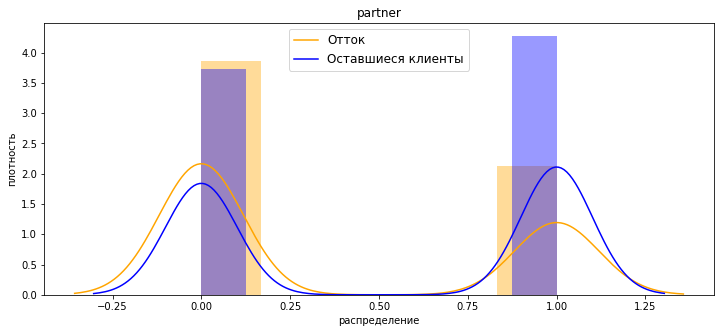

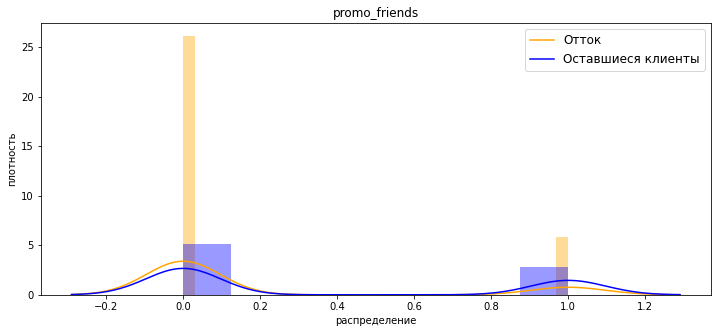

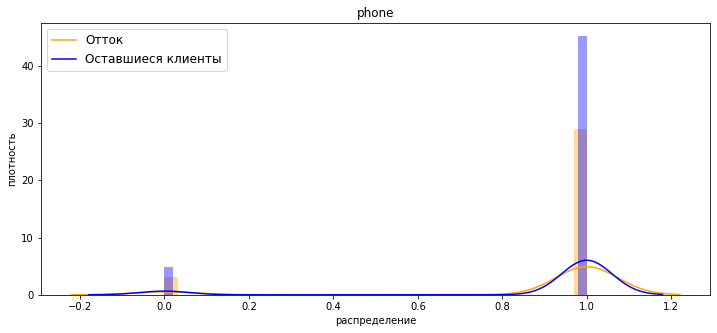

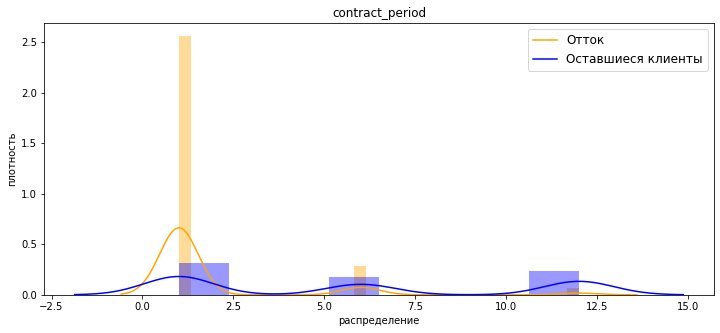

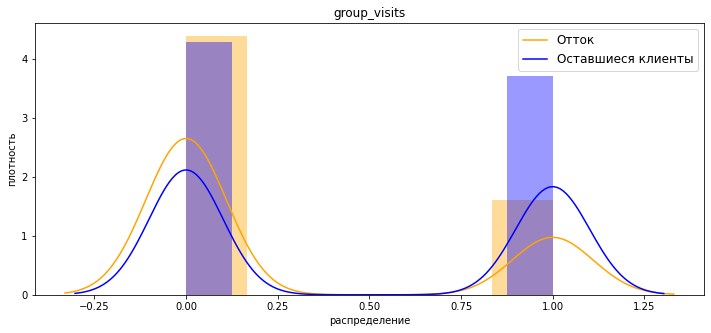

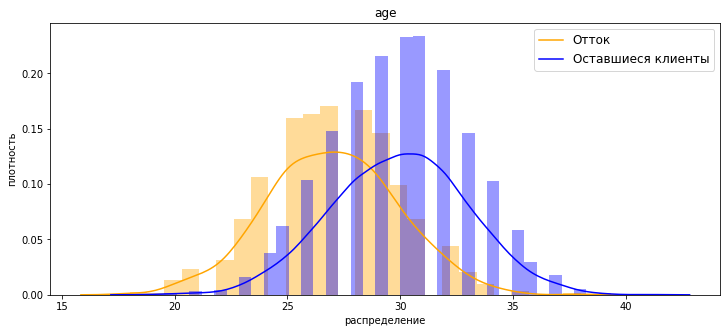

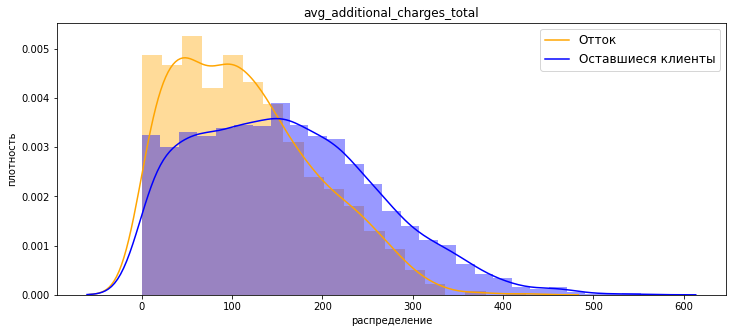

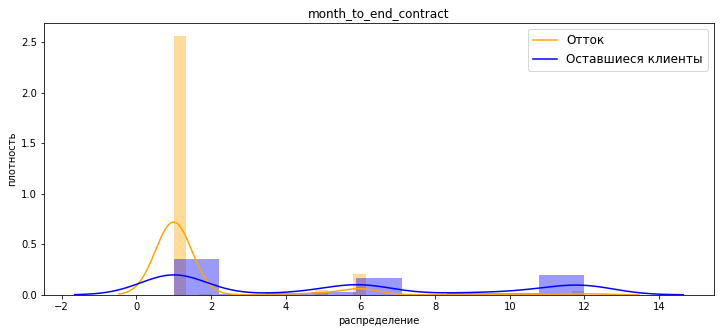

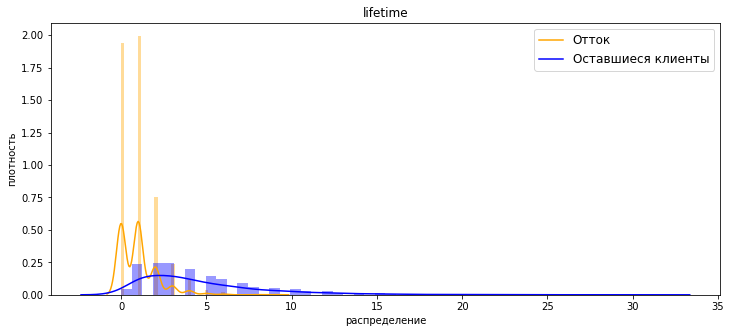

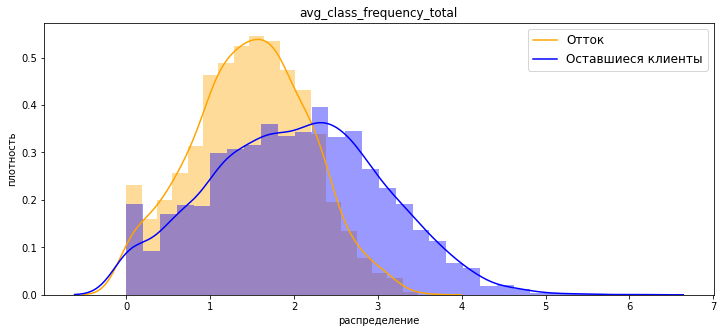

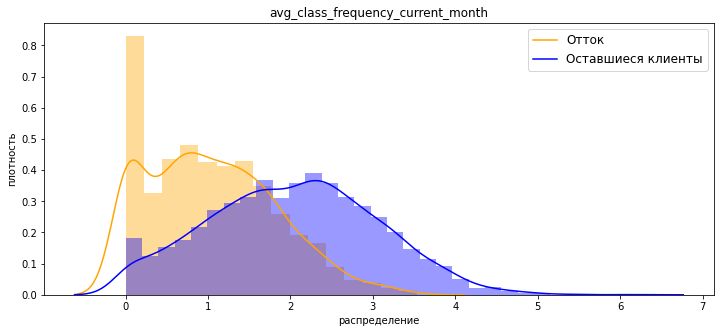

In [9]:
list_columns = df_gym.columns.tolist()
for i in list_columns[0:13]:
    hist_gym(i)

In [10]:
df_gym.columns.shape

(14,)

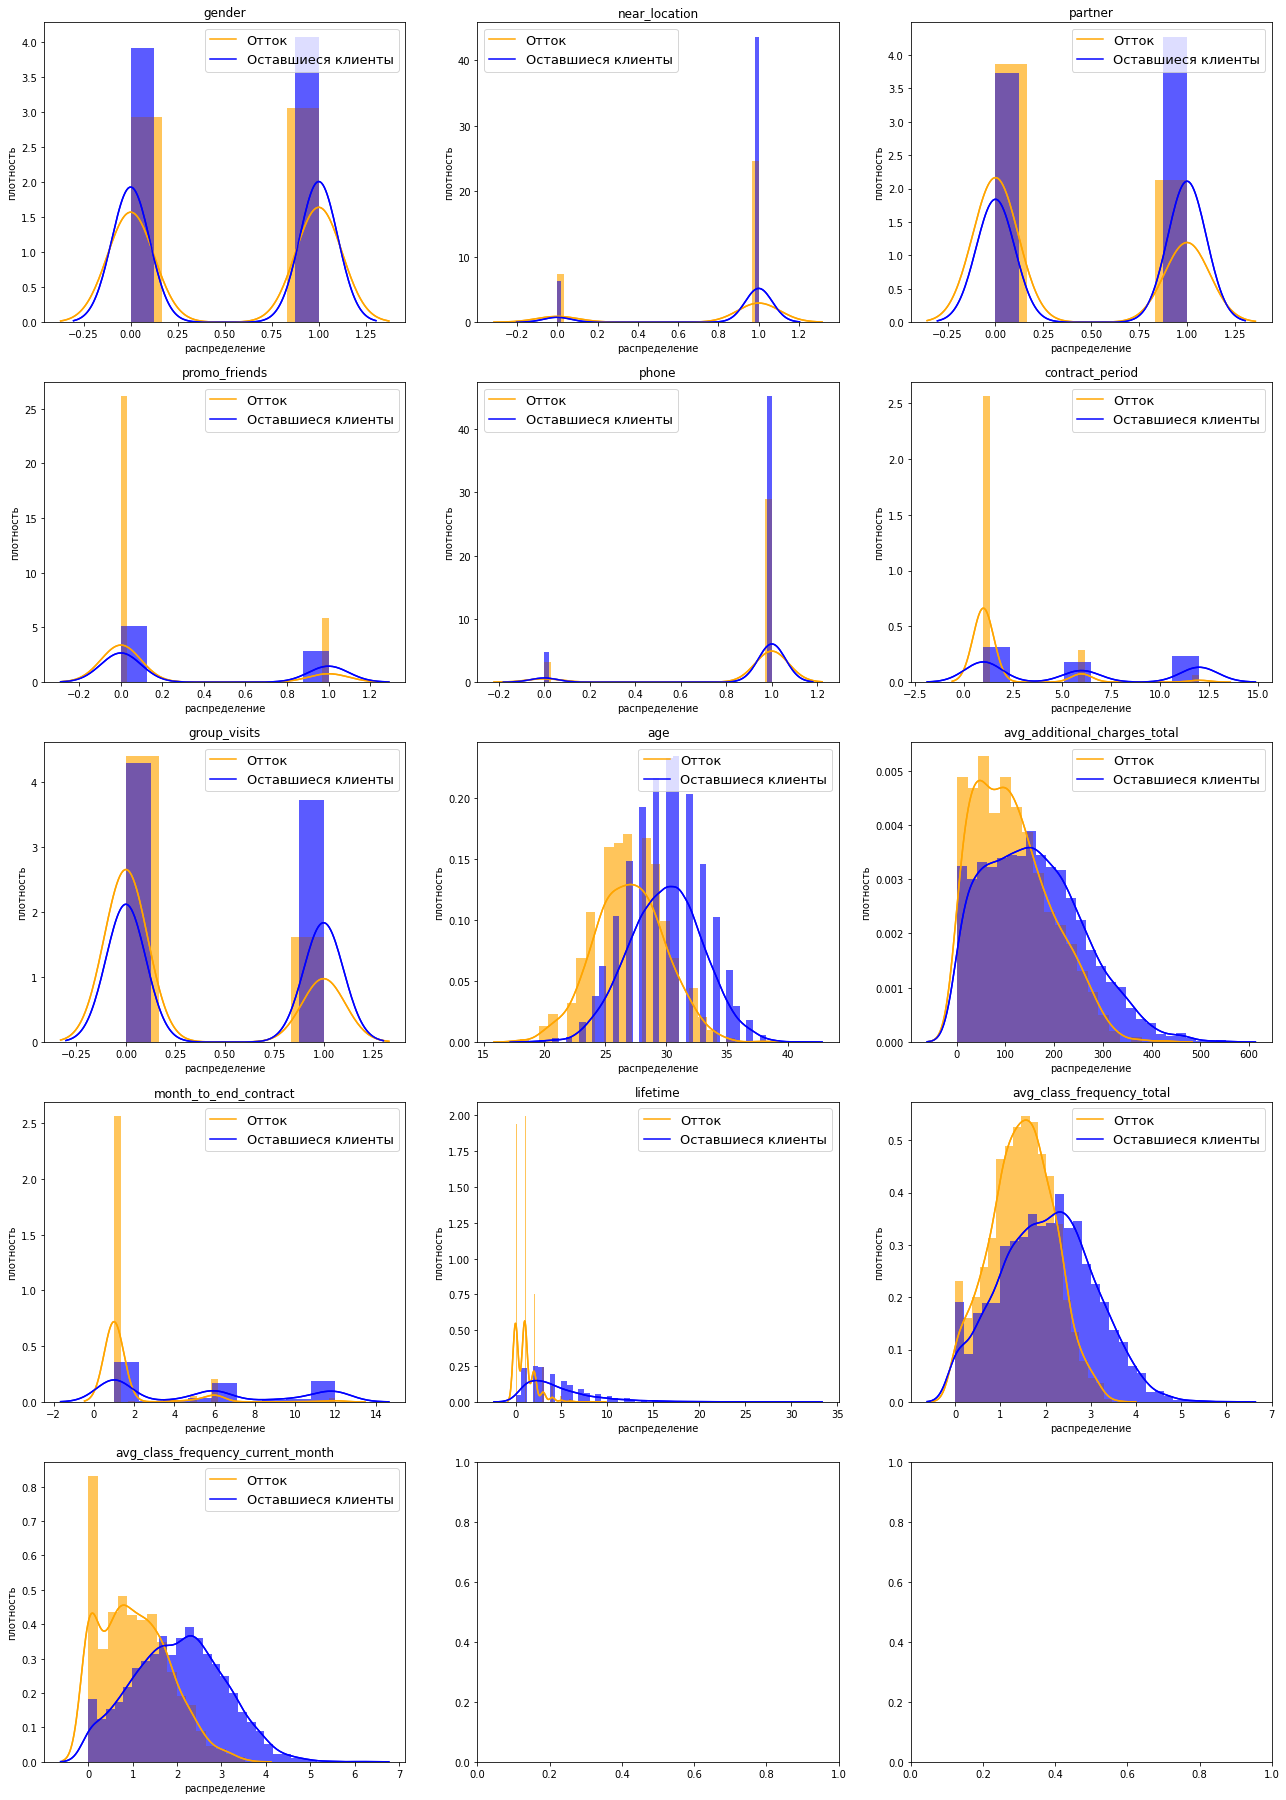

In [12]:
def hist_gym(column, x, y, choice_churn, ax):
    df_gym_lost = df_gym[df_gym['churn'] == 1][column].values
    df_gym_good = df_gym[df_gym['churn'] == 0][column].values
    sns.distplot(a = df_gym_lost, color = 'orange', ax = ax)
    sns.distplot(df_gym_good, color = 'blue', ax = ax)
    ax.set_xlabel('распределение')
    ax.set_ylabel('плотность')
    ax.legend(labels=['Отток', 'Оставшиеся клиенты'], fontsize = 13)
    ax.set_title(column, fontsize=12);
    
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(22, 32))
# Чтобы можно было обращаться по одному индексу, а не двум
axes = axes.flatten()
list_columns = df_gym.columns.tolist()
for i, x in enumerate(list_columns[0:13]):
    hist_gym(x, 0, 0, 0, axes[i])
    hist_gym(x, 1, 0, 1, axes[i])

### Вывод

Исходя из анализа графиков распределения видим следующее:

- По возрасту и полу клиенты распределены практически равномерно, немного больше отток клиентов в возрасте 25-30 лет, в возрасте 28-35 - клиенты остаются привеженцами посещения финтес-центра.
- больше остается клиентов, кто проживает в районе фитнес-центра.
- Относительно партнерской программы, наблюдаем больший отток тех, кто не принимат в ней участие.
- Интересное наблюдение видим среди тех, кто пришел по программе "приведи друга". Большая часть оттока именно таких клиентов, по сравнению с оставшимися.
- Наличие номера телефона клиента в базе данных не сильно влияет на отток.
- Сильный перекос в сторону оттока киентов, которые имеют длительность абонемента мении 2-х месяцев. Те же клиенты, кто имеет в наличии абонемент от 2-х месяцев и выше, стабильно остаются в рядах поснтителей фитнес-центра.
- По участию в групповых занятиях спортом также можно сказать, что это один из признаков того, что клиенты в большей степени не попадают в отток.
- Интересная картина распределения по суммарной выручке от дополнительных услуг, скос влево. То есть те, кто попадает в отток тратят меньше (до 200 руб... дальше снижение и редкие случаи затрат в районе 300 руб). А вот те, кто остается, тратят больше и стабильно, отмечаются максимумы от 400 до 500 руб. 
- распределение по признаку оставшегося времени до конца абонемента по оттоку скошено сильно влево. Уходят те, кто имеет оставшийся срок действия абенемента меньше месяца, а вот остаются в основном те, кто имеет более длительный срок, здесь и распределение равномерно.
- Также по признаку 'lifetime' (время с момента первого обращения в фитнес-центр) распределение клиентов также скошено влево как в предыдущем признаке, и также в основном в отток податают те, кто посещал финтес-центр около 1-2 месяцев.
- По частоте посещений в неделю за весь период можем сказать что оставшиеся клиенты как привило посещают финтес 2-3 раза в неделю, иногда цифра доходит и до 4-5 раз, и распределение здесь нормальное. А вот те, кто покинул финтес-центр, чаще посещают 1-2 раза в неделю, редко это количество приближается к 3-м.
- не менее интересная картина наблюдается по частоте посещений в неделю на прошедший месяц. Согласно графику, распределение в этом контексте смещено влево, среди тех клиентов, кто покинул фитнес, все больше посещающих фитнес до 2-рах в неделю, даже больше цифра стремиться к 1 (единице).


### Отображение матрицы корреляций

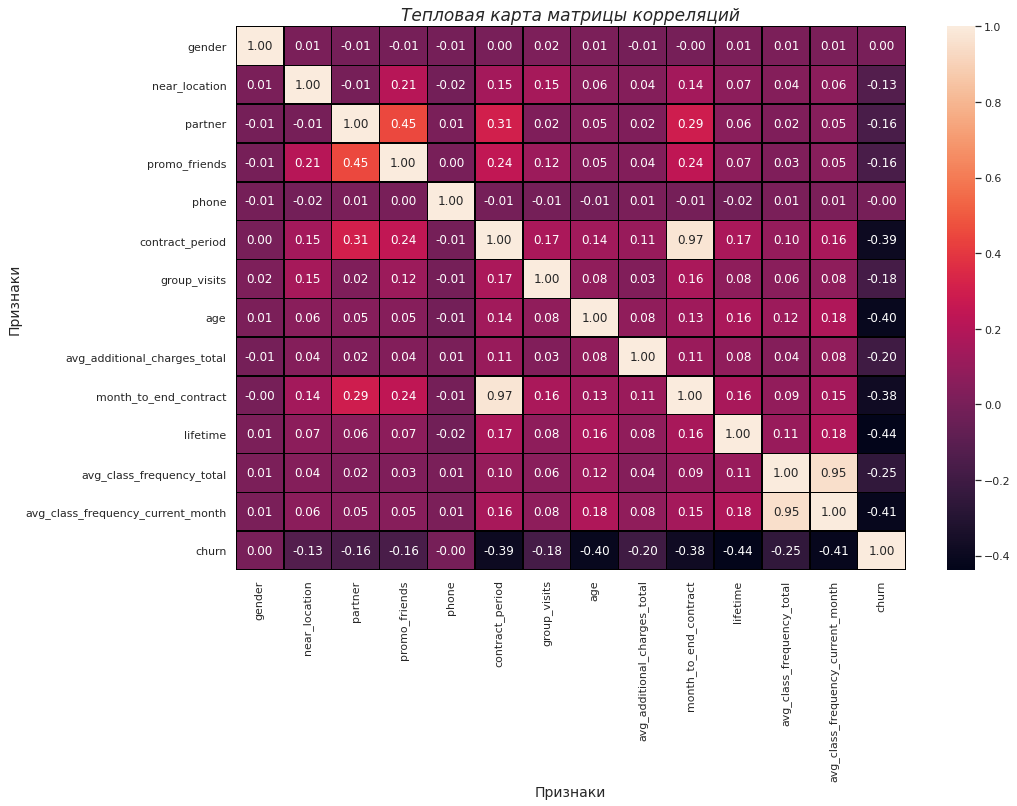

In [13]:
# рассчитаем матрицу корреляции
cm = df_gym.corr()

# отобразим матрицу
sns.set(style='white')
plt.figure(figsize=(15, 10))
plt.title('Тепловая карта матрицы корреляций', fontsize=17, style="italic")
sns.heatmap(cm, annot=True, linewidths=0.5,fmt = '0.2f', linecolor='black')

plt.xlabel('Признаки', fontsize = 14) 
plt.ylabel('Признаки', fontsize = 14) 
plt.show()

### Вывод

По матрице корреляций видим, что сильно влияющих на отток признаков не наблюдается.
Больше остальных с целевой переменной коррелируют: 
- жизненный путь (lifetime) клиента - чем он больше, тем меньше вероятность оттока
- частоста посещений клуба за последний месяц,
- возраст, 
- срок действующего абонемента 
- количество месяцев до истечения абонемента.

А вот пол клиентов и наличие номера телефона в базе фитнес-центра (phone) практически никак не связаны с оттоком. В дальнейшем исследовауем этот факт дополнительно, и приймем решение об оставлении данных признаков при построении модели или их исключении.

Также наблюдаем, что между собой сильно коррелируют две пары признаков:
- срок абонемента (contract_period) и количество месяцев до конца абонемента (month_to_end_contract)
- средняя частота посещений за весь период (avg_class_frequency_total) и средняя частота посещений за последний месяц (avg_class_frequency_current_month). 

Причины такой корреляции могут объясняться нем, что обе пары признаков схожи между собой по заданным первоначально критериям определения мамих признаков.

<a id="three"></a> 
## Построение модели прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

In [14]:
# Разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df_gym.drop('churn', axis = 1)
y = df_gym['churn']

In [15]:
#Разбьем данные на обучающую и валидационную выборку функцией train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

In [16]:
# обучаем StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# преобразуем обучающий и валидационные наборы данных

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Обучим модель на train-выборке двумя способами:

- логистической регрессией,

In [17]:
# зададим алгоритм для нашей модели
model = LogisticRegression(random_state=0)

# обучим модель
model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы

predictions_log_reg = model.predict(X_test_st)

# model.predict_proba(X_test) выдаёт вектор пар значений, где первое значение соответствует вероятности отнесения 
# к первому ("0") классу, а второе — ко второму ("1"). Чтобы получить вектор вероятностей отнесения ко второму ("1") классу,
# обращаемся по индексу — model.predict_proba(X_test)[:,1] 

probabilities_log_reg = model.predict_proba(X_test_st)[:,1]

- случайный лес:

In [18]:
# задаем алгоритм для новой модели на основе алгоритма случайного леса

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 

# обучаем модель случайного леса

rf_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы

rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

Оценим метрики accuracy, precision, recall, F1, Roc_auc для обеих моделей на валидационной выборке. Сравните по ним модели и посмотрим, какая модель показала себя лучше на основании метрик.



- Accuracy: доля правильных ответов
- Precision: точность (англ. precision)
- Recall: полнота
- F1_score: баланс между Precision and Recall
- ROC_AUC: для оценки качества классификатора

In [19]:
# Создаем функцию для вывода метрик обучающих моделей

def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации '):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [20]:
# выведем все метрики
print_all_metrics(y_test, predictions_log_reg, probabilities_log_reg, title = 'Метрики для модели  логистической регрессии')

print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели  логистической регрессии
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85
	F1: 0.87
	ROC_AUC: 0.98
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83
	F1: 0.85
	ROC_AUC: 0.97


Обе модели себя поазали хорошо, но метрики для модели логистической регрессии имеют показатели немного лучше. 

Ранее при анализе корреляций мы наблюдали два признака, которые практически не влияли на показатель оттока клиентов фитнес-центра. Поэтому перед проведением кластеризации, проверим как изменятся метрики для обоих моделей при исключении указанных признаков из переменной для обучения моделей. И приймем на основании показателей дальнейшее решение.

In [21]:
#Удалим сильно коррелирующие столбцы данных, сделаем отдельный датасет без них для проверки

df_gym_drop_corr = df_gym.copy()
df_gym_drop_corr = df_gym_drop_corr.drop(['gender', 'phone'], axis=1)


X = df_gym_drop_corr.drop('churn', axis = 1)
y = df_gym_drop_corr['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)



In [22]:
# обучаем StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)




In [23]:
#логистическая регрессия

# зададим алгоритм для нашей модели
model = LogisticRegression(random_state=0)

# обучим модель
model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы

predictions_log_reg = model.predict(X_test_st)

probabilities_log_reg = model.predict_proba(X_test_st)[:,1]





In [24]:
#случайный лес

# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)



RandomForestClassifier(random_state=0)

In [25]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы

rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]




In [26]:
# напишем функцию для вывода метрик обучающих моделей
def print_all_metrics_corr(y_true, y_pred, y_proba, title = 'Метрики классификации без коррелирующих признаков'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))
    
    


In [27]:
# выведем все метрики
print_all_metrics(y_test, predictions_log_reg, probabilities_log_reg, title = 'Метрики для модели  логистической регрессии без коррелирующих признаков:')

print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса без коррелирующих признаков:')

Метрики для модели  логистической регрессии без коррелирующих признаков:
	Accuracy: 0.93
	Precision: 0.89
	Recall: 0.85
	F1: 0.87
	ROC_AUC: 0.98
Метрики для модели случайного леса без коррелирующих признаков:
	Accuracy: 0.93
	Precision: 0.90
	Recall: 0.83
	F1: 0.86
	ROC_AUC: 0.97


### Вывод

При обучении модели использовали два алгоритма: логистическая регрессия и случайный лес. При использовании датасета с полными данными более высокие по всем метрикам показала модель логистической регрессии, хотя отличие метрик не значительное.

Провели исследование метрик при обучении модели на данных с исключенными признаками пола (gender) и наличия контактного телефона (phone). При сравнении метрик видим, что у модели случайного леса показатель Precision (точность) стал немного лучше, чем у модели логистической регрессии - 0.90 против 0.89.

Показатель метрики Accuracy (доля правильных ответов) стал одинаковым у обоих моделей, а вот по остальным метрикам также осталось незначительное превосходство модели логистической регрессии.

Что касается сравнения метрик самой модели случайного леса до и после исключения коррелирующих признаков из датасета, то ее метрики незначительно улучшились, а вот для модели логистической регрессии метрики стали хуже.

На основании выщеизложенного, мной принято решение не исключать  признаками пола (gender) и наличия контактного телефона (phone) из датасета при дальнейшей работе.

P.s. При проверочном построении кластеров на таком датасете (с исключенными признаками) - получилось всего три кластера, что также было не в пользу исключения признаков.  

<a id="four"></a> 
## Кластеризация клиентов фитнес-центра

Стандартизируем данные. Отложим в сторону столбец с оттоком. 

Строим матрицу расстояний на стандартизованной матрице признаков и отобразим дендрограмму, оценим предложенное алгоритмом количество кластеров.

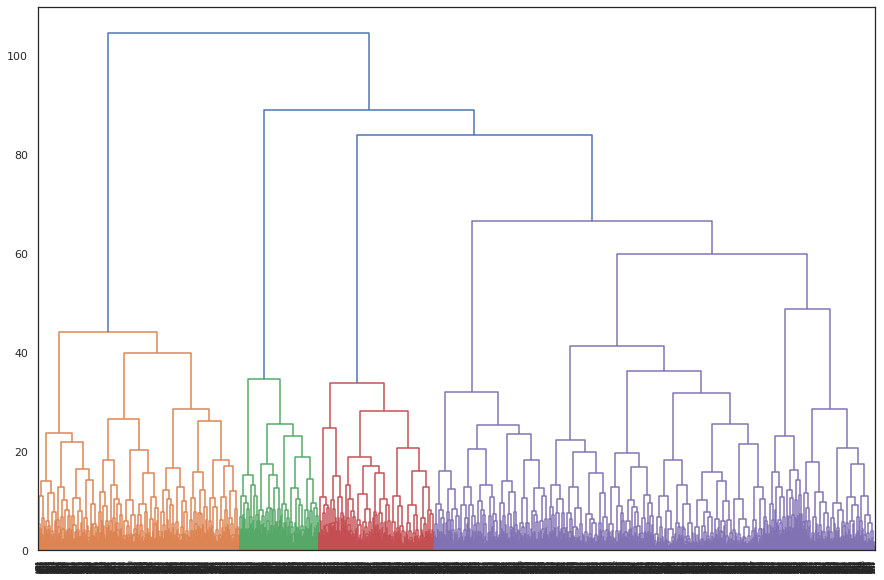

In [28]:
# выделяем данные для кластеризации

X_cl = df_gym.drop('churn', axis = 1)


# стандартизируем

sc = StandardScaler()
X_sc = sc.fit_transform(X_cl)


# строим таблицу расстояний между объектами

linked = linkage(X_sc, method = 'ward') 


# визуализируем (строим дендрограмму)

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 


Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.

Исходя из дендрограммы, определяется число кластеров, равное 4 (четырем).

В задании проекта определено обязательное условие по количеству кластеров, поэтому, принимаем число кластеров равным 5 (пяти).

In [29]:

km = KMeans(n_clusters = 5, random_state = 1)

# прогнозируем кластеры для наблюдений
labels = km.fit_predict(X_sc)

# сохраняем метки кластера в поле нашего датасета

df_gym['cluster'] = labels

# выводим статистику по средним значениям наших признаков по кластеру, вернем столбец 'churn'

display(df_gym.groupby('cluster').agg('mean').T)



cluster,0,1,2,3,4
gender,0.500960,0.519319,0.498371,0.505426,0.523316
near_location,0.000000,1.000000,0.951140,1.000000,0.862694
partner,0.464491,0.224623,0.739414,0.773643,0.471503
promo_friends,0.078695,0.000000,0.466884,1.000000,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,2.343570,2.056974,11.511401,2.972093,4.777202
group_visits,0.216891,0.379175,0.543974,0.451163,0.427461
age,28.579655,28.918140,29.964169,29.120930,29.297927
avg_additional_charges_total,136.561586,141.863877,166.325823,141.317434,144.208179
month_to_end_contract,2.197697,1.963982,10.457112,2.778295,4.466321


In [30]:
# посмотрим размеры кластеров
print('Размеры кластеров:')
display(df_gym.groupby('cluster').agg(count=('age','count')))


Размеры кластеров:


,count
cluster,
0,521
1,1527
2,921
3,645
4,386


In [31]:
# посчитаем долю каждого кластера в общем обьеме

for cluster_pt in range(0, 5):
    cluster_percent = round(df_gym[df_gym['cluster'] == cluster_pt].shape[0]/df_gym.shape[0]*100, 2)
    print('Доля  кластера', cluster_pt, '-', cluster_percent, '%')


Доля  кластера 0 - 13.03 %
Доля  кластера 1 - 38.17 %
Доля  кластера 2 - 23.03 %
Доля  кластера 3 - 16.12 %
Доля  кластера 4 - 9.65 %


Построим распределения признаков для кластеров.

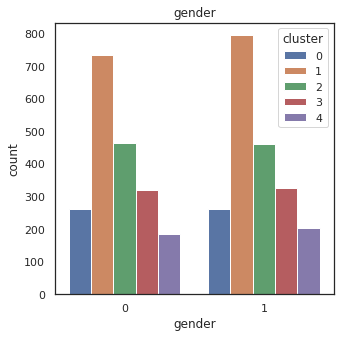

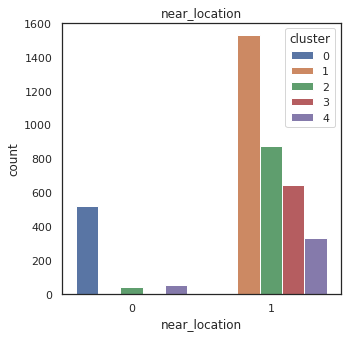

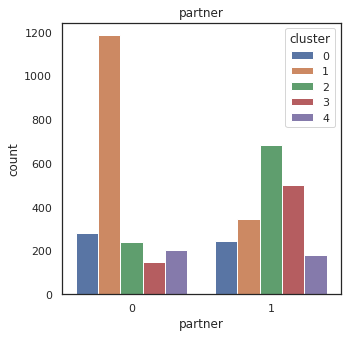

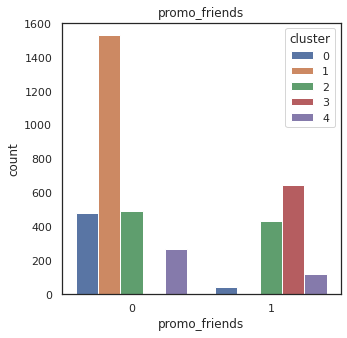

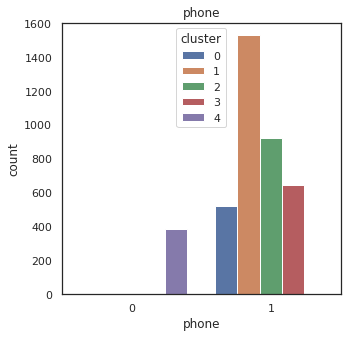

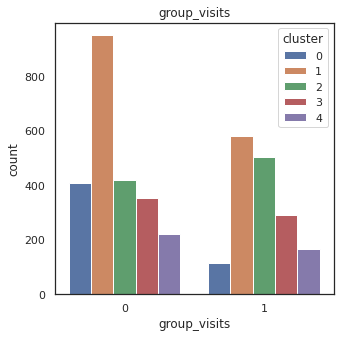

In [32]:
# построим countplot-графики для бинарных признаков

for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df_gym[column], hue='cluster', data=df_gym)
    plt.title(column)
    plt.show()

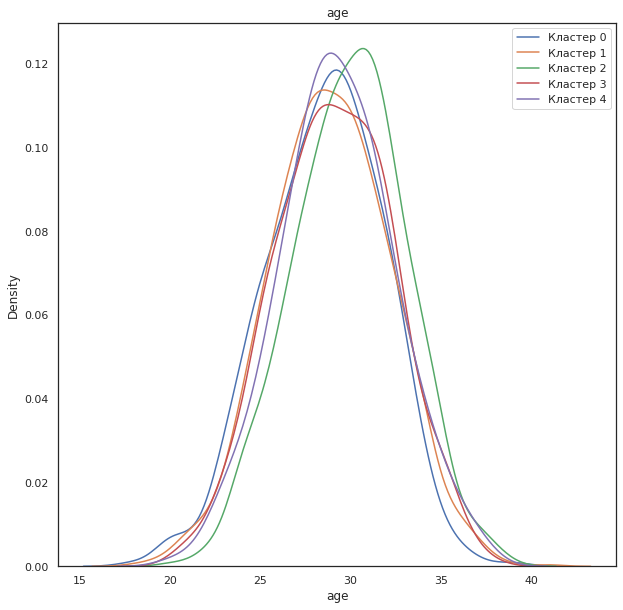

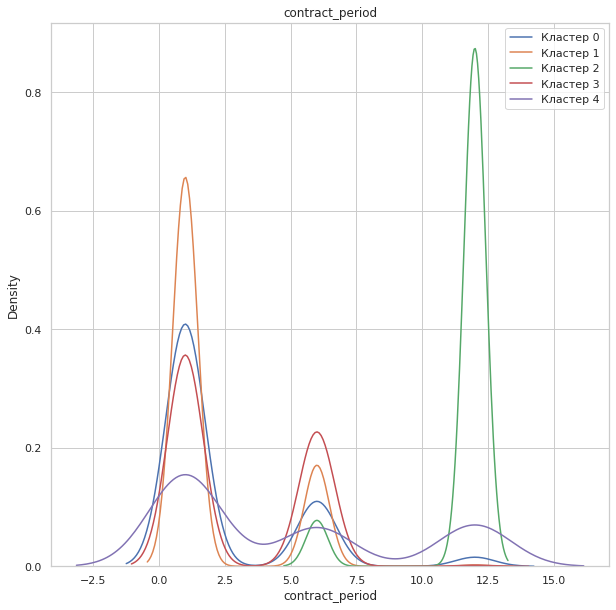

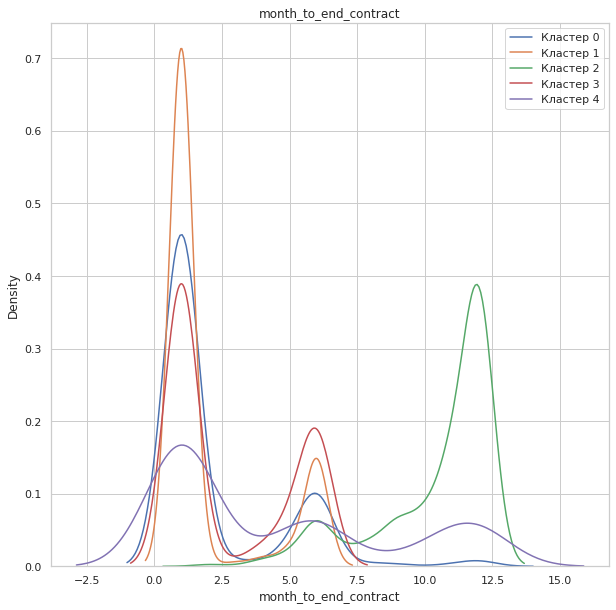

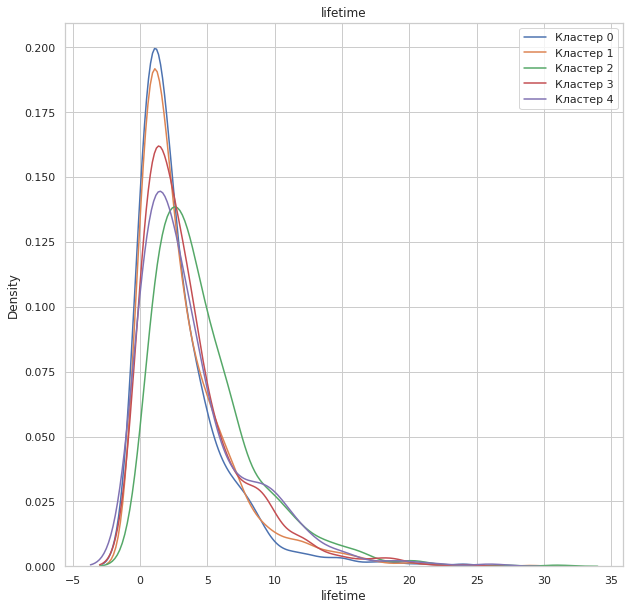

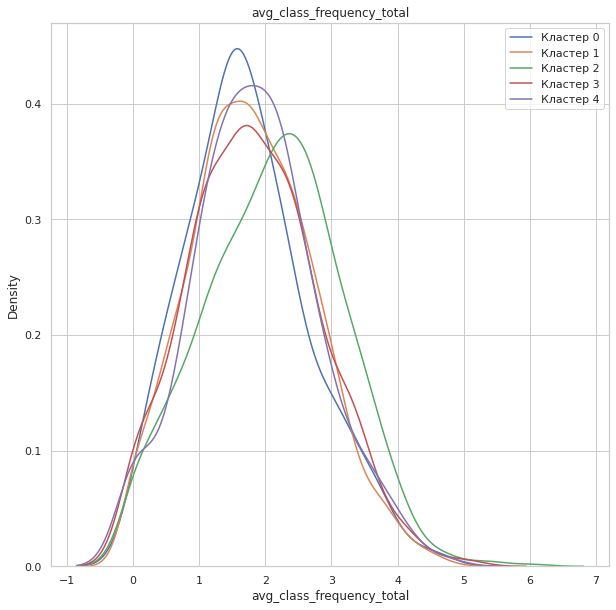

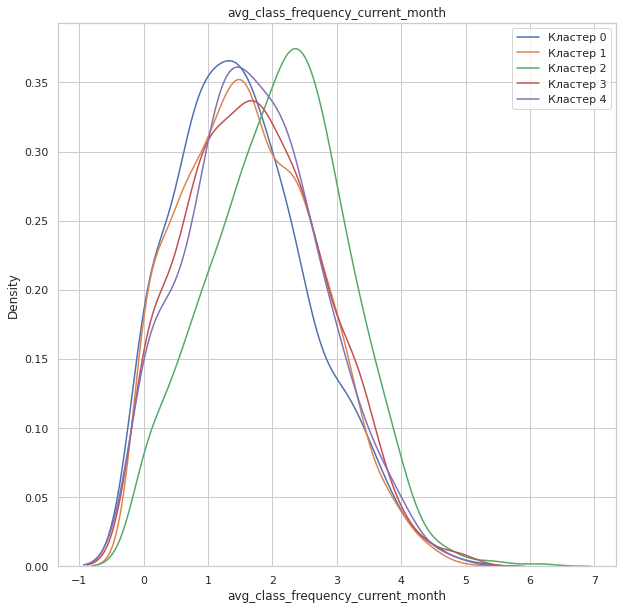

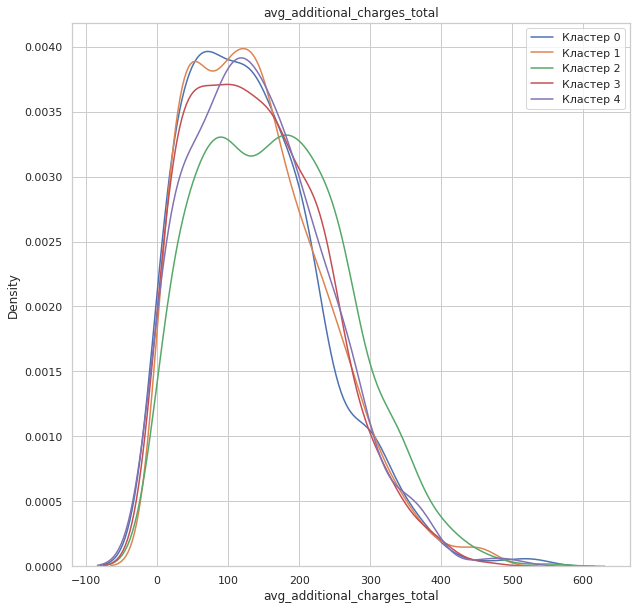

In [33]:
# построим kdeplot-графики для небинарных признаков

for column in ['age', 'contract_period', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'avg_additional_charges_total']:
    plt.figure(figsize=(10, 10))
    plt.title(column)   
    sns.kdeplot(df_gym.query('cluster==0')[column], label = 'Кластер 0')
    sns.kdeplot(df_gym.query('cluster==1')[column], label = 'Кластер 1')
    sns.kdeplot(df_gym.query('cluster==2')[column], label = 'Кластер 2')
    sns.kdeplot(df_gym.query('cluster==3')[column], label = 'Кластер 3')
    sns.kdeplot(df_gym.query('cluster==4')[column], label = 'Кластер 4')
    
    sns.set_style('whitegrid')
    plt.legend()
    plt.show()

In [34]:
# посмотрим средние значения оттока в кластерах
df_gym.groupby('cluster').agg({'churn':'mean'}).sort_values(by='churn')

,churn
cluster,
2,0.019544
3,0.252713
4,0.266839
1,0.362148
0,0.429942


### Вывод


Самые высокие показатели относительно оттока клиентов показывает кластер "0" (42,9 %). Его отличительные характеристики следующие: возраст 28-29 лет, абонететн на 2-3 месяца, клиенты не проживают поблизости к финтес-центру, срок до окончания действующего абонемента 2 месяца, посещения - 1-2 раза в неделю, время прошудшее с момента первого посещения - 2-3 месяца. Также длительность абонемента у клиентов данного кластера 2-3 месяца, акцией "приведи друга" практически не пользуются, самый низкий показатель по дополнительным затратам и посещению групповых занятий спортом. Доля кластера - 13 %.

Вторым по показателям оттока видим кластер "1" (36,2 % - тоже не мало). Его показатели практически приближены к показателям кластера "0", только наплюдается в 2 раза меньшее использование "партнерских программ", не использование акции "приведи друга" и показатель проживания по отдаленности от фитнес-центра прямо противоположный. Доля кластера - 38,17 % (много).


Лучшими показателями по надежности клиентов фитнес-центра брадает кластер "2" (1,9 % оттока). Присмотримся к его характеристикам: возраст клиентов - 30 лет, проживание поблизости от фитнес-центра - 95 %, использование партнерской программы  на 73 % и акции "приведи друга" на 46,6 %. Частота посещений в неделю в этом кластере не сильно отличается от других кластеров - 2 раза в неделю, а вот что особенно хочется отметить, так это показатель длительности абонемента в 11-12 месяцев, срок до окончания текущего действующего абонемента - 10,5 месяцев и время с момента первого обращения - 4,8 месяцев (постоянные клиенты). Затраты на дополнительные услуги в этом кластере самые высокие, но в целом отличие по этому признаку незначительное -166 руб ( в кластере "0" - 136 руб. соответственно). Доля этого кластера в общей объеме 23 %. Не мало, но есть над чем поработать.
 
 






<a id="five"></a> 
## Выводы и базовые рекомендации по работе с клиентами.


На основании исследования определим самые определяющие признаки надежности клиента фитнес-центра:

- возраст около 30 лет
- посещает групповые занятия
- использует акции для привлечения друзей к занятиям спортом
- использует партнерские программы фитнес-центра
- имеет абонемент сроком от 6 до 12 месяцев (в основном годовой абонемент)
- проживает близко к фитнес-центру

Следовательно, для выполнения задачи увеличения в фитнес-центре доли надежных (не попадающих в отток) клиентов, рекоменую следующее:

1. Проводить систему аналитику потоков посещения клиентами фитнес-центра - периодически, с целью систематизации маркетинговых мер по улучшению показателей (не дожидаясь оттока клиентов).

2. Подготовить либо улучшить систему скидок на абонементы с длительным сроком (6-12 месяцев), чтобы такие абонементы бало покупать более выгодно из расчета стоимости в месяц.

3. Увеличить долю рекламы, акций для граждан, проживающих поблизости от фитнес-центра (например, массовые спортивные либо акционные мероприятия в районе нахождения фитнес-центра).

4. Сделать более привлекательными для клиентов акции по привлечению ими друзей в спортивные программы фитнес-центра. Также, сами абонементы, которые получают друзья по акции сделать более выгодными для этих друзей.

5. Подготовить более выгодные предложения для граждан  20-25 лет. Возможно отток связан с материальным плложением, так как в этом возрасте в большинстве своем молодые люди являются студентами. Также хороши в этом направлении будут мероприятия по улучшению привлекательности интернет приложений, и проведение спортивных мероприятий совместно с ВУЗами. 

6. Рекомендую увеличение охвата компаний по партнерским программам привлечения и скидок их сотрудникам.



